## Packages importing

In [14]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

BASE_PATH = Path("../Datasets/")

sns.set()
tqdm.pandas(colour='red')

 ### Loading data

In [15]:
def get_text_files(file_name: str):
    '''open file and return the content'''
    with open(f'../{file_name}', "r", encoding="utf8") as file:
        txt = file.read()
    return txt

In [10]:
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
art = pd.read_csv(BASE_PATH/'article_files.csv')

In [11]:
wiki.sample(4, random_state=34)

,file_path,dataset_name,length
9233,Datasets/wikitext_raw/wiki10206.txt,wiki_text,1281
6234,Datasets/wikitext_raw/wiki6890.txt,wiki_text,2870
5647,Datasets/wikitext_raw/wiki6253.txt,wiki_text,22070
2522,Datasets/wikitext_raw/wiki2793.txt,wiki_text,7135


In [12]:
mag.sample(4, random_state=42)

,file_path,dataset_name,length
2470,Datasets/magazine_raw/mag2526.txt,magazine_text,8254
1034,Datasets/magazine_raw/mag1060.txt,magazine_text,2978
6206,Datasets/magazine_raw/mag6452.txt,magazine_text,10577
5218,Datasets/magazine_raw/mag5410.txt,magazine_text,1002


In [16]:
wiki['content'] = wiki['file_path'].progress_map(get_text_files)
mag['content'] = mag['file_path'].progress_map(get_text_files)
art['content'] = art['file_path'].progress_map(get_text_files)

100%|██████████| 16844/16844 [02:57<00:00, 94.82it/s] 


In [18]:
mag.sample(4)

,file_path,dataset_name,length,content
1516,Datasets/magazine_raw/mag1550.txt,magazine_text,3050,"രാജസ്ഥാനിലെ ജോധ്പുർ ജില്ലയിൽ, പാകിസ്ഥാനിൽ നിന്..."
6784,Datasets/magazine_raw/mag7063.txt,magazine_text,6789,നാലാം ക്ലാസ് വരെ പ്രണയം എന്തെന്ന് ഞാന്‍ അറിഞ്...
6370,Datasets/magazine_raw/mag6622.txt,magazine_text,5627,രാത്രികളില്‍ ഒറ്റയ്ക്ക് ഇറങ്ങിനടക്കാന്‍ കഴിയാത...
2810,Datasets/magazine_raw/mag2870.txt,magazine_text,3682,ഗാന്ധിജി എന്നത് സമാധാനം എന്ന വാക്കിന്റെ പര്യായ...


In [19]:
wiki.sample(4)

,file_path,dataset_name,length,content
1558,Datasets/wikitext_raw/wiki1728.txt,wiki_text,995,സമൃദ്ധിയുടേയും ഉർവരതയുടേയും ദേവതയാണു ലജ്ജാ ഗൗര...
1274,Datasets/wikitext_raw/wiki1415.txt,wiki_text,2244,ഇന്ത്യൻ സ്പേസ് റിസർച്ച് ഓർഗനൈസേഷൻ വികസിപ്പിച്ച...
7967,Datasets/wikitext_raw/wiki8807.txt,wiki_text,3264,ഇൽതുമിഷ് ഇന്ത്യ ഭരിച്ച അടിമ വംശത്തിലെ സുൽത്താൻ...
7921,Datasets/wikitext_raw/wiki8757.txt,wiki_text,8925,"ഹെബ്രായ-ബൈബിളിൽ, ഒരു യുവാവിന്റേയും യുവതിയുടേയു..."


In [20]:
art.sample(4)

,file_path,dataset_name,length,content
1740,Datasets\articles_raw\article1740.txt,article_text,1712,മഹാരാഷ്ട്രയിലെ പൂന്തോപ്പുകളിലും വഴിയോരങ്ങളിലും...
165,Datasets\articles_raw\article165.txt,article_text,6145,"പിറ്റേന്ന് നേരം വെളുത്തപ്പോള്‍, ഇന്നലെ നടന്നതെ..."
9997,Datasets\articles_raw\article9997.txt,article_text,6323,ബാരക്കിലെ ഒ.വി വിജയൻ (കഥ) മൂവന്തിയിലെ ഇരുട്ട് ...
268,Datasets\articles_raw\article268.txt,article_text,6727,ചരിത്രസ്മാരക ങ്ങളിലേക്കുള്ള യാത്രയ്ക്കിടയില്‍ ...


### Analysing

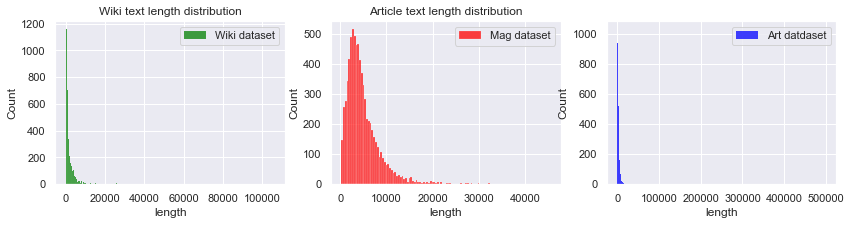

In [24]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (14, 3))

sns.histplot(wiki['length'], ax = ax[0], color = 'green', label="Wiki dataset")
sns.histplot(mag['length'], ax = ax[1], color = 'red', label="Mag dataset")
sns.histplot(art['length'], ax = ax[2], color='blue', label='Art datdaset')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_title('Wiki text length distribution')
ax[1].set_title('Magazine text length distribution')
ax[1].set_title('Article text length distribution')

plt.show()

#### Checking for Duplicates

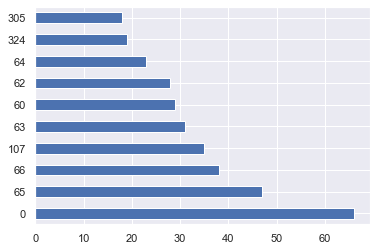

In [53]:
wiki['length'].value_counts().head(10).plot.barh();

In [55]:
wiki.describe()

,length
count,12388.000000
mean,2269.721101
std,4845.988836
min,0.000000
25%,451.750000
50%,959.000000
75%,2200.000000
max,106224.000000


In [79]:
wiki = wiki[wiki['length'] >= 200]
wiki.drop('content', axis =1).to_csv(BASE_PATH/"wikitext_files.csv", index = False)

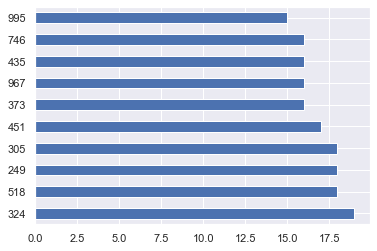

In [60]:
wiki['length'].value_counts().head(10).plot.barh();

In [33]:
wiki[wiki['length'] == 995]['content'].sample(10)
# just keeping the data because we're going to build language model.

3539     ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
7625     സമൃദ്ധിയുടേയും ഉർവരതയുടേയും ദേവതയാണു ലജ്ജാ ഗൗര...
7943     പഞ്ചാബ് സംസ്ഥാനത്തെ കപൂർത്തല ജില്ലയിലെ ഒരു വില...
3469     പഞ്ചാബ് സംസ്ഥാനത്തെ കപൂർത്തല ജില്ലയിലെ ഒരു വില...
3607     പ്രശസ്ത ഗണിതശാസ്ത്രജ്ഞനും, സാമ്പത്തിക ശാസ്ത്രത...
1558     സമൃദ്ധിയുടേയും ഉർവരതയുടേയും ദേവതയാണു ലജ്ജാ ഗൗര...
7230     ഡഗ്മാറാ ഡോമിൻസ്കിക്ക് ഒരു പോളിഷ്-അമേരിക്കൻ അഭി...
2037     ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
11138    ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
1647     ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
Name: content, dtype: object

In [34]:
len(wiki), len(wiki['content'].unique())

(11227, 8329)

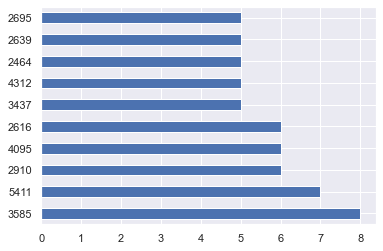

In [69]:
mag['length'].value_counts().head(10).plot.barh();

In [56]:
mag.describe()

,length
count,7863.000000
mean,4887.352792
std,3907.649499
min,203.000000
25%,2417.000000
50%,3889.000000
75%,6188.000000
max,45545.000000


In [77]:
mag[mag['length'] == 3585]['content'].sample(8)
# just keeping the data because we're going to build language model.

5805    ഉള്ളിലുണ്ടാവും, തോരാതെ ചില മഴകള്‍. മഴക്കാലങ്ങള...
2538    രാജ്യത്ത് ഉള്ളിവില വര്‍ദ്ധിച്ച് കിലോഗ്രാമിന് 2...
1345    പെട്ടെന്നൊരു ദിവസം എല്ലാ മനുഷ്യരും ഉറുമ്പുകളായ...
3910    കുഞ്ഞുങ്ങളുടെ വളര്‍ച്ചപോലെ മറ്റൊന്നില്ല. കുസൃത...
6335    കുടുംബത്തോട് ഇണങ്ങിച്ചേരുന്ന വളര്‍ത്തുമൃഗമായാണ...
2200    ഇന്ന് എണ്ണിയാലൊടുങ്ങാത്ത രോഗങ്ങളുടെ നാടുവിലാണ്...
3993    കാണാമറയത്ത് നിങ്ങള്‍ അന്വേഷിക്കുന്ന പ്രിയപ്പെട...
666     നിങ്ങളിൽ ആരെങ്കിലും ഒരു റഷ്യൻ ചാരനെ, ഒരു കെജിബ...
Name: content, dtype: object

In [32]:
len(mag), len(mag['content'].unique())

(7539, 7536)

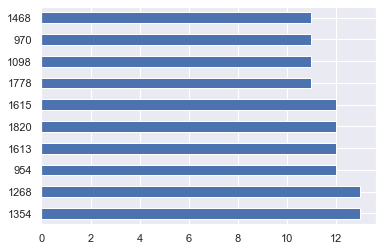

In [25]:
art['length'].value_counts().head(10).plot.barh();

In [31]:
art.describe()

,length
count,16844.000000
mean,3501.558656
std,6111.416941
min,1.000000
25%,1447.000000
50%,2432.000000
75%,4060.000000
max,499724.000000


In [28]:
art[art['length'] == 1354]['content'].sample(8)

13417    കഥകളിലും സിനിമകളിലും നിഗൂഢത പരത്തി പറന്നുനടന്ന...
12648    പിച്ചവച്ചു നടക്കുന്ന  പ്രായത്തിൽത്തന്നെ തകർപ്പ...
16782    കരിങ്കോഴി വളർത്തൽ ഏറ്റവും ലാഭകരമായ ബിസിനസാണെന്...
5886     ബാഹ്യപ്രകൃതിയും സ്വഭാവ സവിശേഷതകളും അടിസ്ഥാനമാക...
167      വിചിത്രവും ഭയമുളവാക്കുന്നതുമായ ധാരാളം ആചാരങ്ങള...
15543    പറമ്പിക്കുളം കടുവ സങ്കേതത്തിലെ സന്ദർശക വിലക്ക്...
8231     ഒരു സ്ത്രീ സന്യാസിയുടെ അടുത്തുചെന്നു സങ്കടം പറ...
6111     കാല്‍നൂറ്റാണ്ടിലേറെയായി പശുവിനെ കുടുംബാംഗത്തെ ...
Name: content, dtype: object

In [29]:
len(art), len(art['content'].unique())

(16844, 16719)